In [1]:
import numpy as np
import pdb
import glob
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
#define working dir
def HRR_CMP(CUDA_dir, nomp_dir, Title ):
    hrr_file_CUDA = CUDA_dir + Title + '_hrr.csv'
    hrr_file_nomp = nomp_dir + Title + '_hrr.csv'
    df_nomp = pd.read_csv(hrr_file_nomp,skiprows=1)
    df_cuda = pd.read_csv(hrr_file_CUDA,skiprows=1)

    fig, ax = plt.subplots(figsize=(12,9))
    ax.plot(df_nomp.Time, df_nomp.HRR,color="red")
    ax.plot(df_cuda.Time, df_cuda.HRR,color="black")
    plt.title( 'Comparison of HRR Between nomp and cuda for ' + Title)
    plt.xlabel("Time(s)")
    plt.ylabel("HRR(KW)")
    plt.legend(["NOMP", "CUDA"])
    plt.show()
    
def STEPS_CMP( CUDA_dir, nomp_dir, Title):
    
    steps_file_CUDA = CUDA_dir + Title + '_steps.csv'
    steps_file_nomp = nomp_dir + Title + '_steps.csv'
    
    df_nomp = pd.read_csv(steps_file_nomp,skiprows=1)
    df_cuda = pd.read_csv(steps_file_CUDA,skiprows=1)

    sp_nomp = (df_nomp["CPU Time"][len(df_nomp)-1]-df_nomp["CPU Time"][len(df_nomp)-2])/ \
      (df_nomp["Simulation Time"][len(df_nomp)-1]-df_nomp["Simulation Time"][len(df_nomp)-2])
    sp_cuda = (df_cuda["CPU Time"][len(df_cuda)-1]-df_cuda["CPU Time"][len(df_cuda)-2])/ \
      (df_cuda["Simulation Time"][len(df_cuda)-1]-df_cuda["Simulation Time"][len(df_cuda)-2])

    print("nomp simulation speed:")
    print(1/sp_nomp)
    print("CUDA simulation speed:")
    print(1/sp_cuda)
    print("sp_nomp/sp_cuda:")
    print(sp_nomp/sp_cuda)

    sp_nomp_total = (df_nomp["CPU Time"][len(df_nomp)-1])/ \
      (df_nomp["Simulation Time"][len(df_nomp)-1])
    sp_cuda_total = (df_cuda["CPU Time"][len(df_cuda)-1])/ \
      (df_cuda["Simulation Time"][len(df_cuda)-1])

    print("sp_nomp_total/sp_cuda_total:")
    print(sp_nomp_total/sp_cuda_total)
    
    fig, ax = plt.subplots(figsize=(12,9))
    ax.plot(df_nomp["Simulation Time"], df_nomp["CPU Time"],color="red")

    ax.plot(df_cuda["Simulation Time"], df_cuda["CPU Time"], color="black")
    plt.title( 'Comparison of simulation process Between nomp and cuda for ' + Title)
    plt.xlabel("Simulation Time(s)")
    plt.ylabel("CPU/GPU Time(s)")
    plt.legend(["NOMP", "CUDA"])

    plt.show()
    
    return 1/sp_cuda, 1/sp_nomp, sp_nomp/sp_cuda - 1



In [3]:
CUDA_dir = '/notebooks/firemodels/fds/fds_gpu_test/CUDA_RTX4000/HPC/'
nomp_dir = '/notebooks/firemodels/fds/fds_gpu_test/nomp_RTX4000/HPC/'


## HRR comparison for accuracy purpose

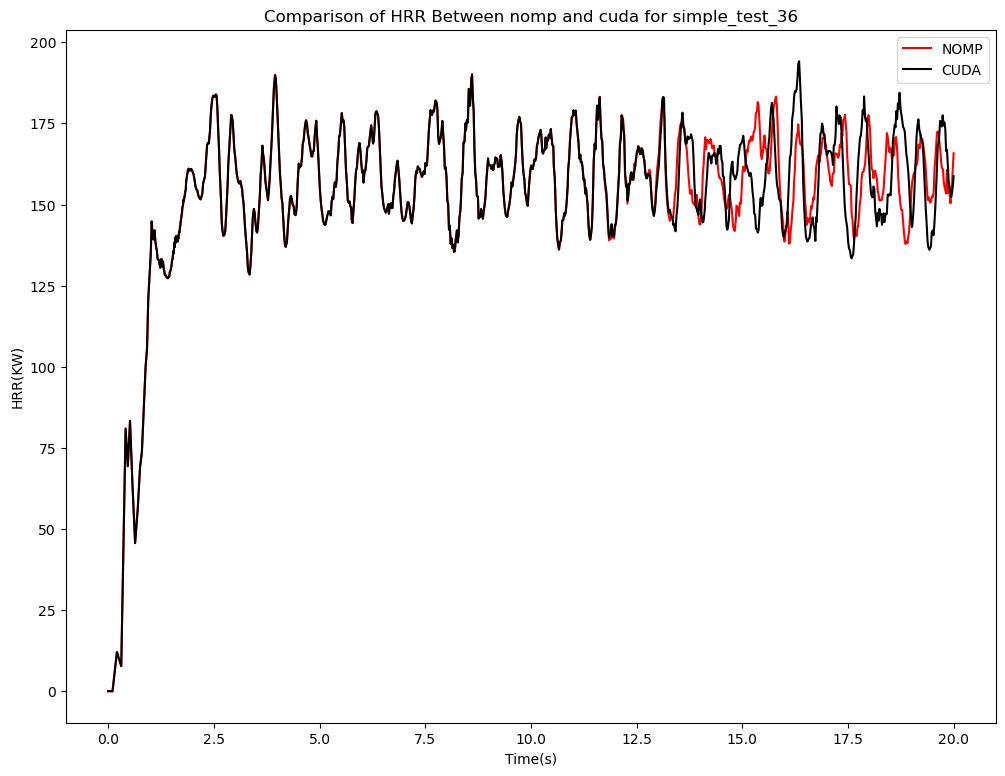

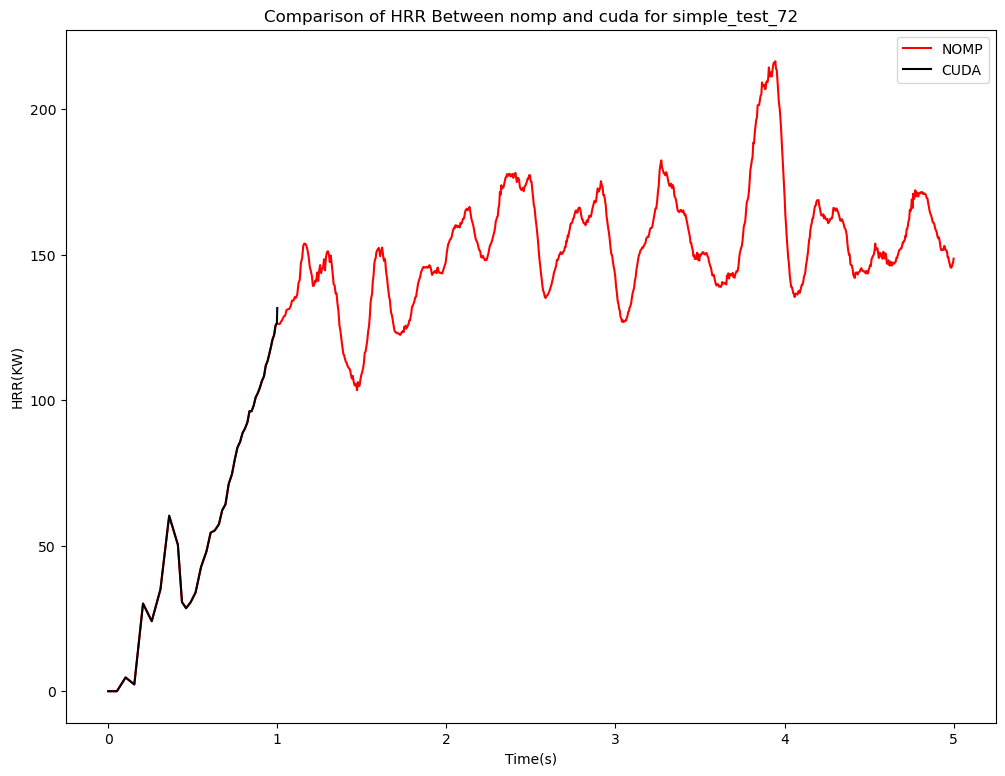

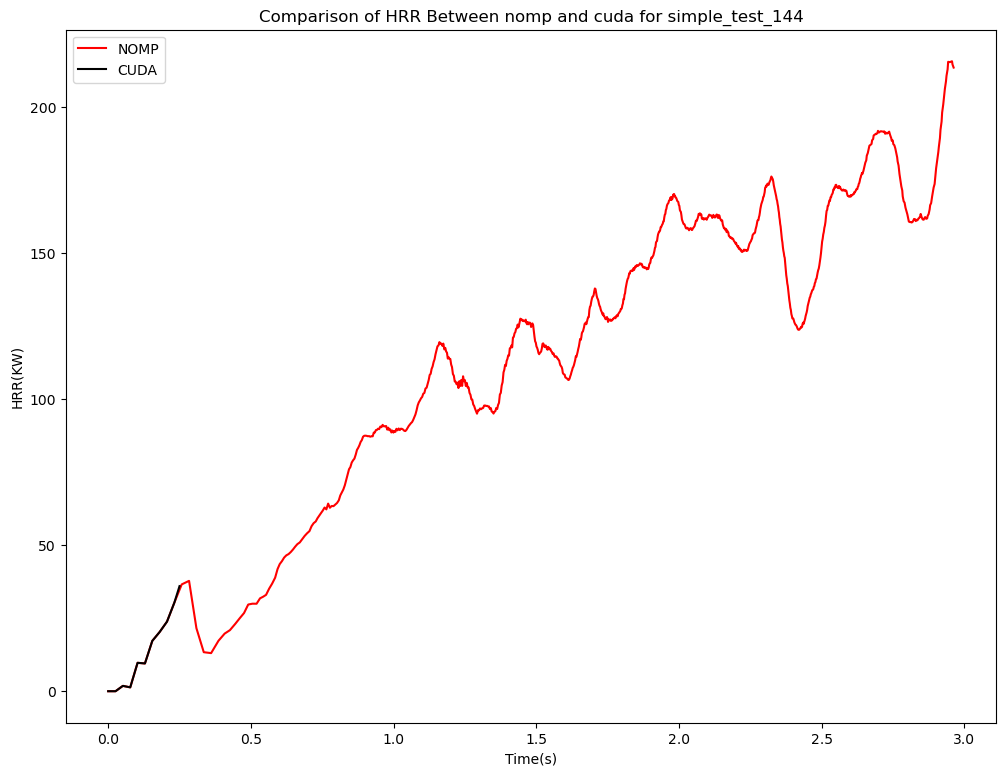

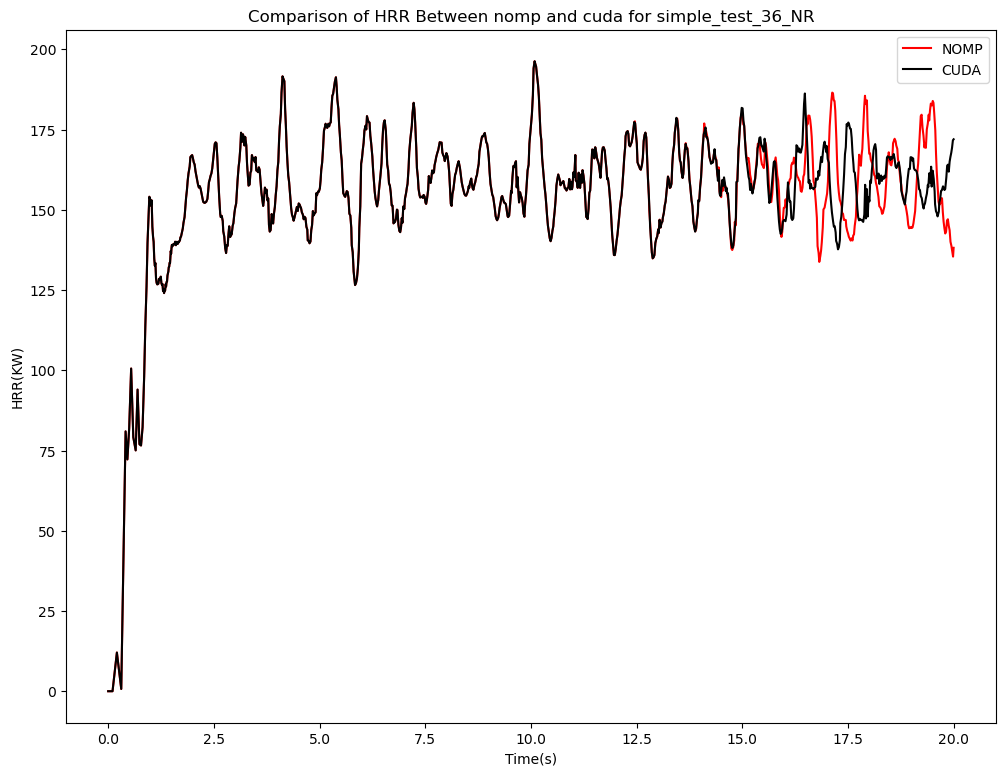

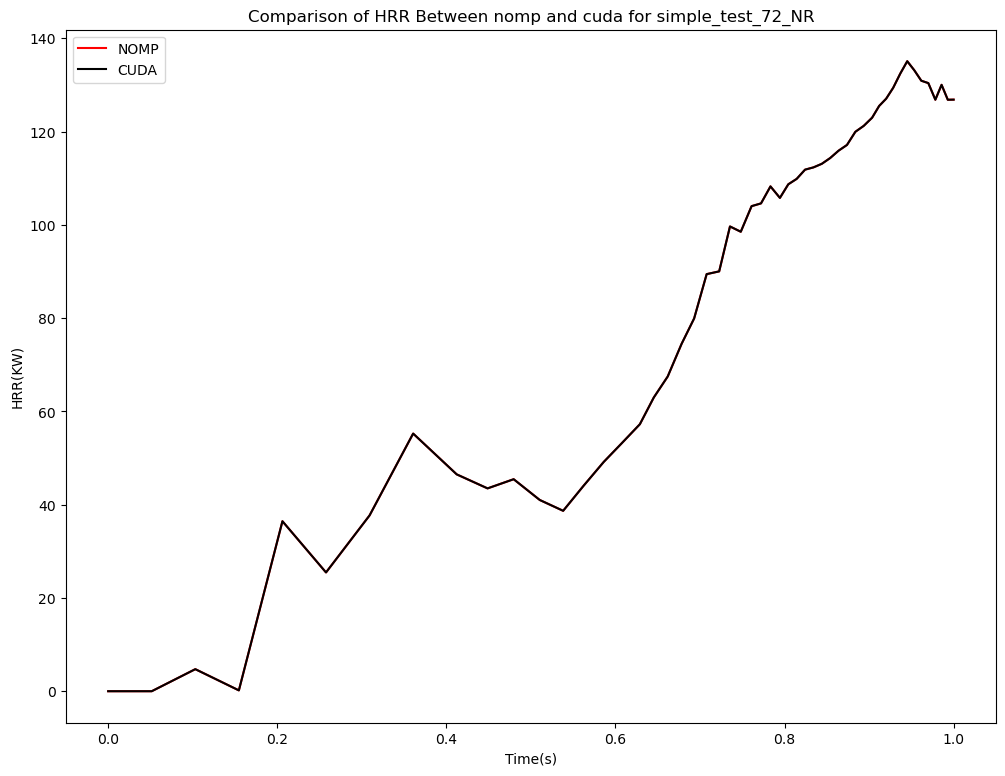

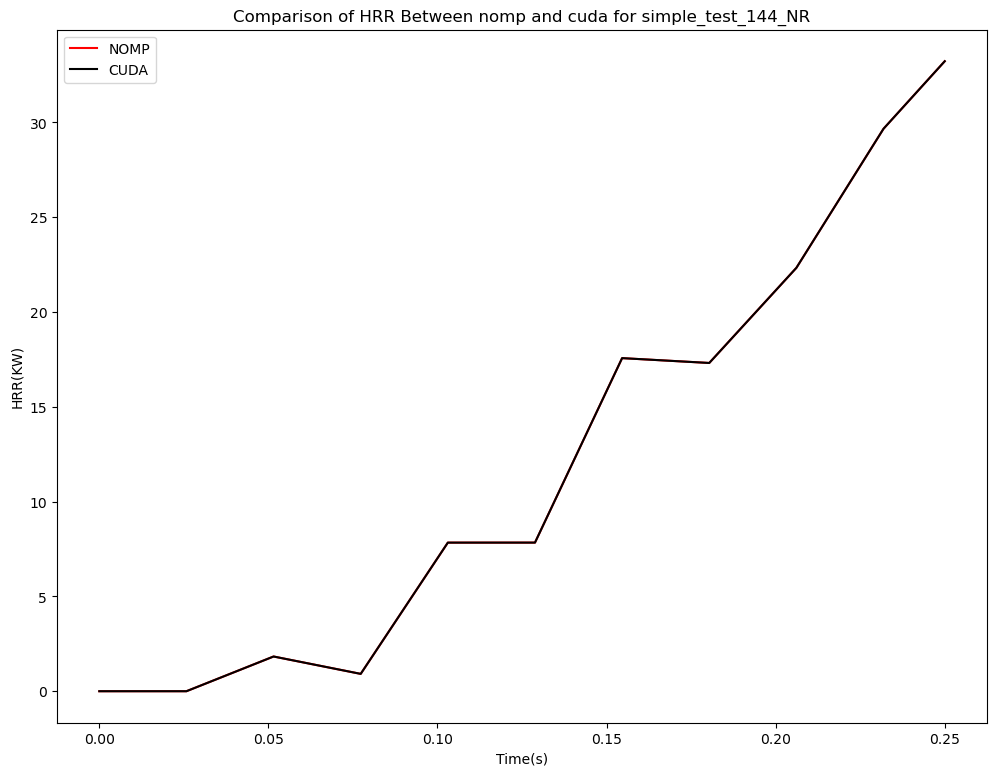

In [4]:

HRR_CMP(CUDA_dir, nomp_dir, "simple_test_36")
HRR_CMP(CUDA_dir, nomp_dir, "simple_test_72")
HRR_CMP(CUDA_dir, nomp_dir,"simple_test_144")

HRR_CMP(CUDA_dir, nomp_dir, "simple_test_36_NR")
HRR_CMP(CUDA_dir, nomp_dir, "simple_test_72_NR")
HRR_CMP(CUDA_dir, nomp_dir,"simple_test_144_NR")




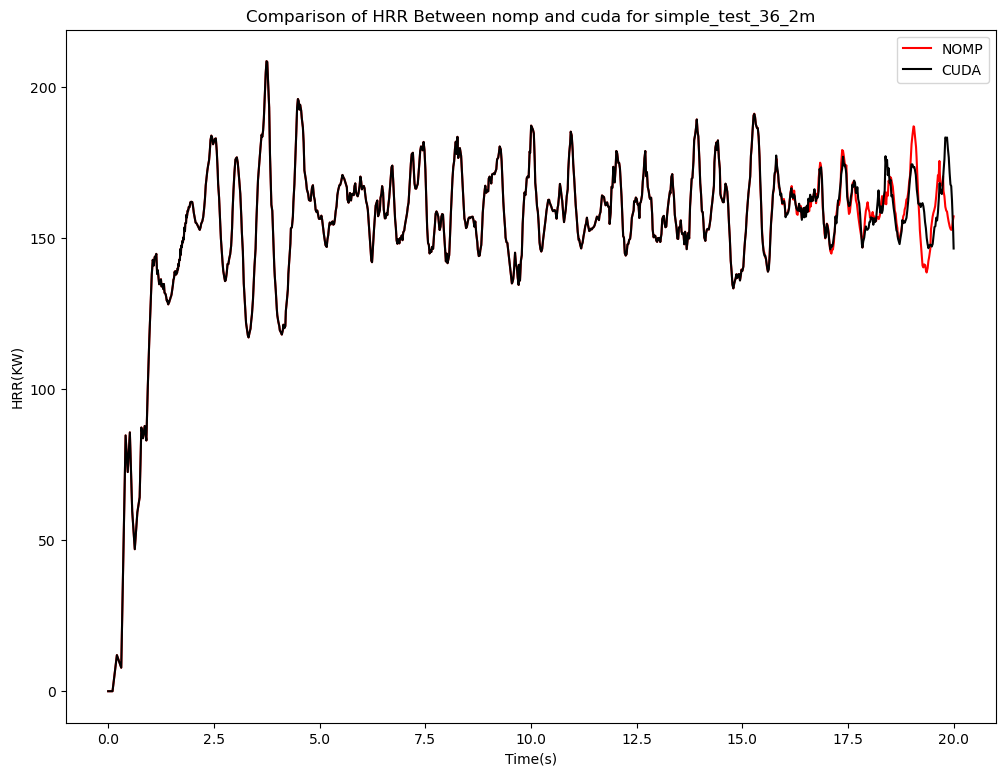

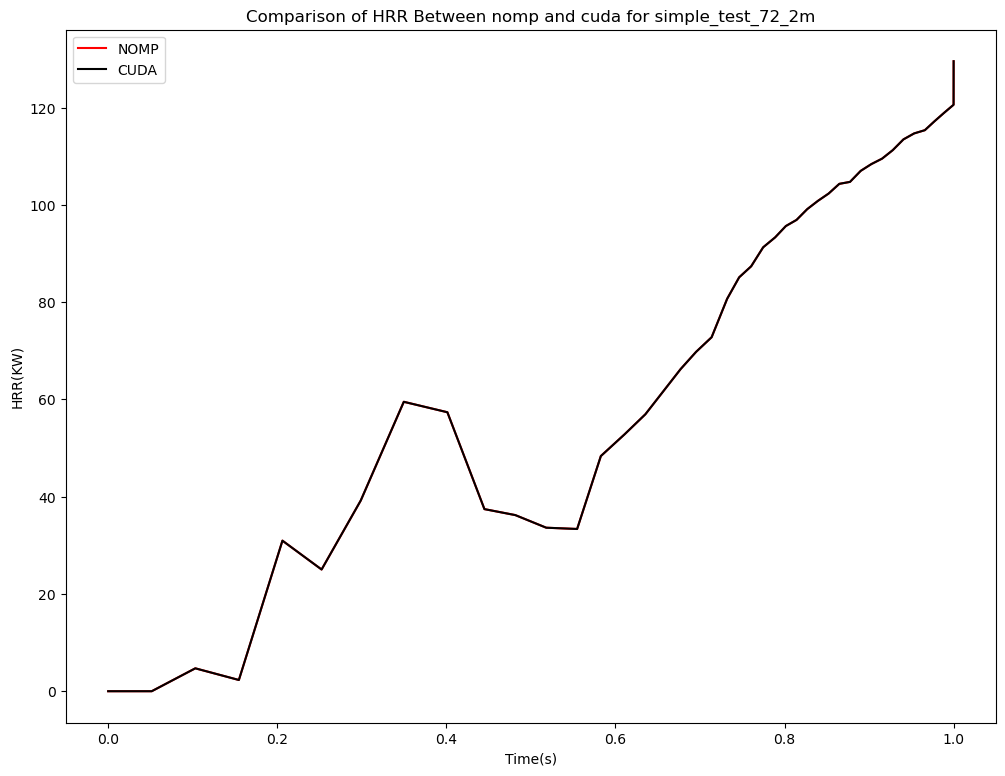

In [5]:
HRR_CMP(CUDA_dir, nomp_dir, "simple_test_36_2m")
HRR_CMP(CUDA_dir, nomp_dir, "simple_test_72_2m")
#HRR_CMP(CUDA_dir, nomp_dir,"simple_test_144_2m")

#HHRR_CMP(CUDA_dir, nomp_dir, "simple_test_36_4m")
#HRR_CMP(CUDA_dir, nomp_dir, "simple_test_72_4m")
#HRR_CMP(CUDA_dir, nomp_dir,"simple_test_144_4m")


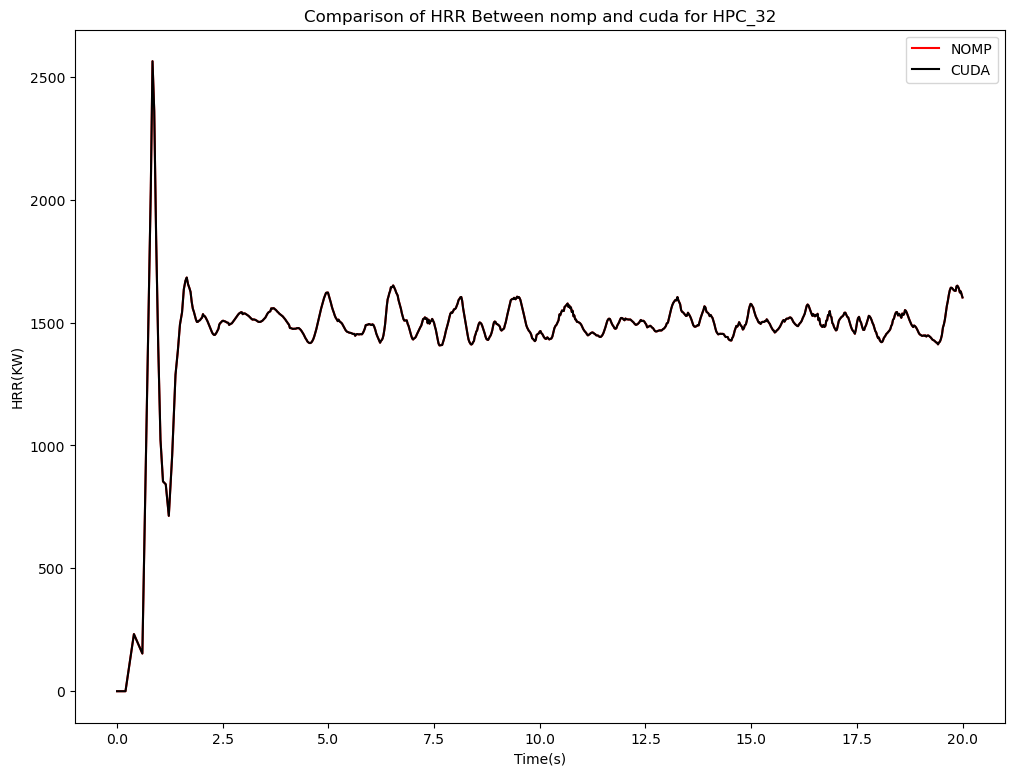

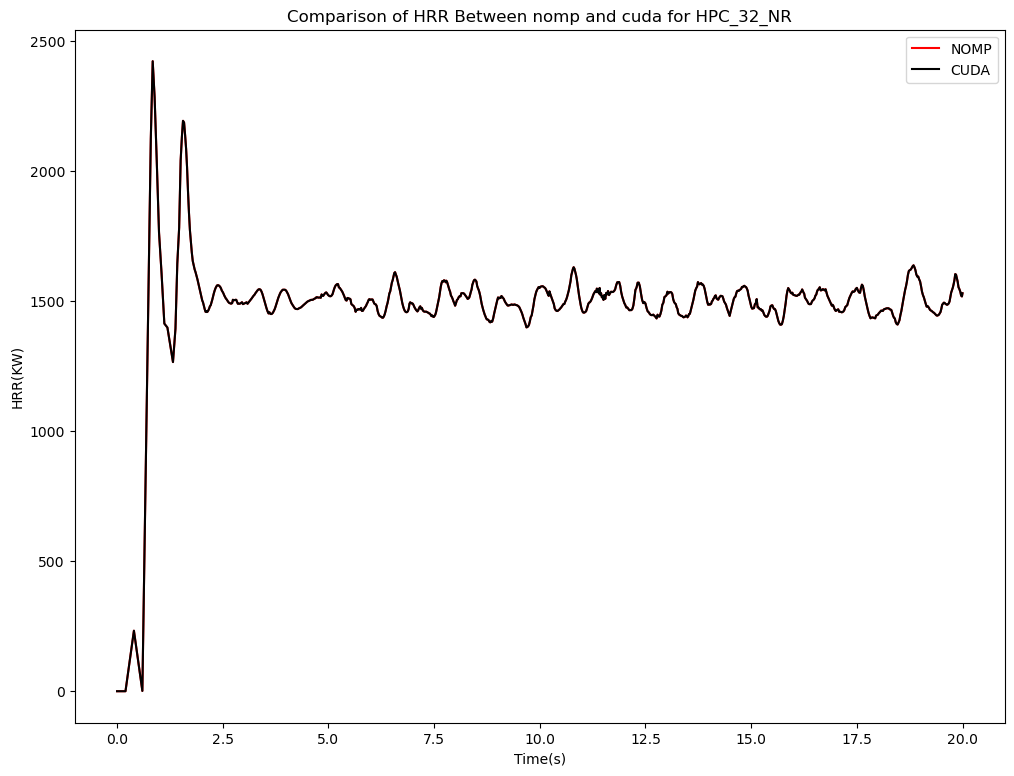

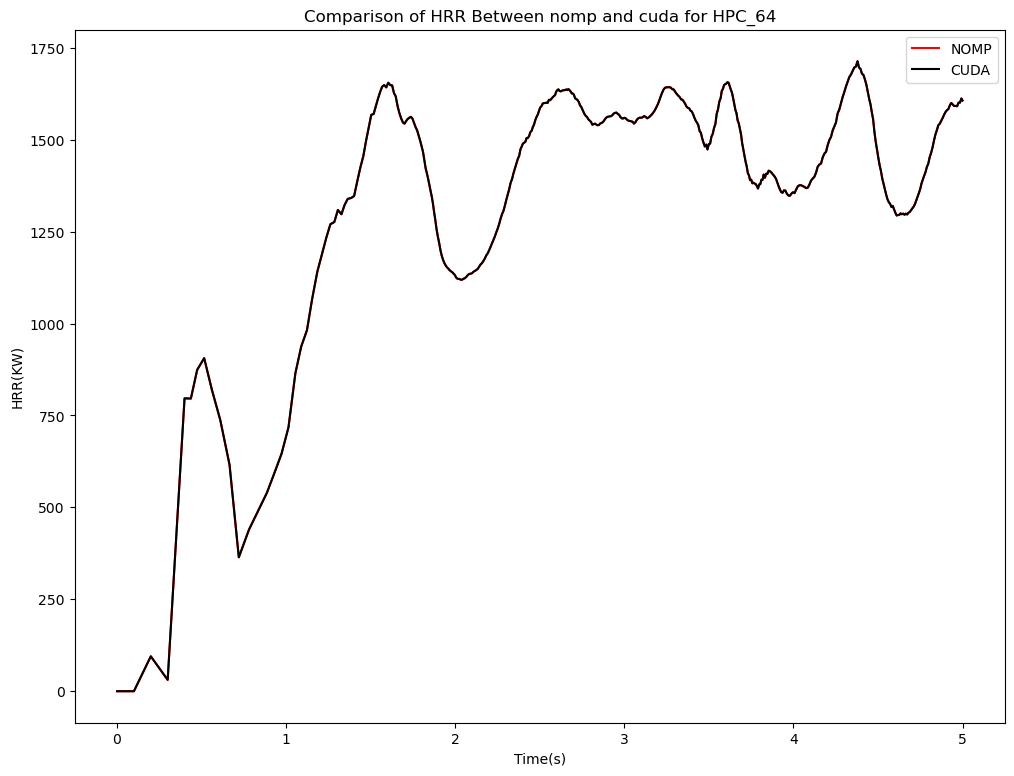

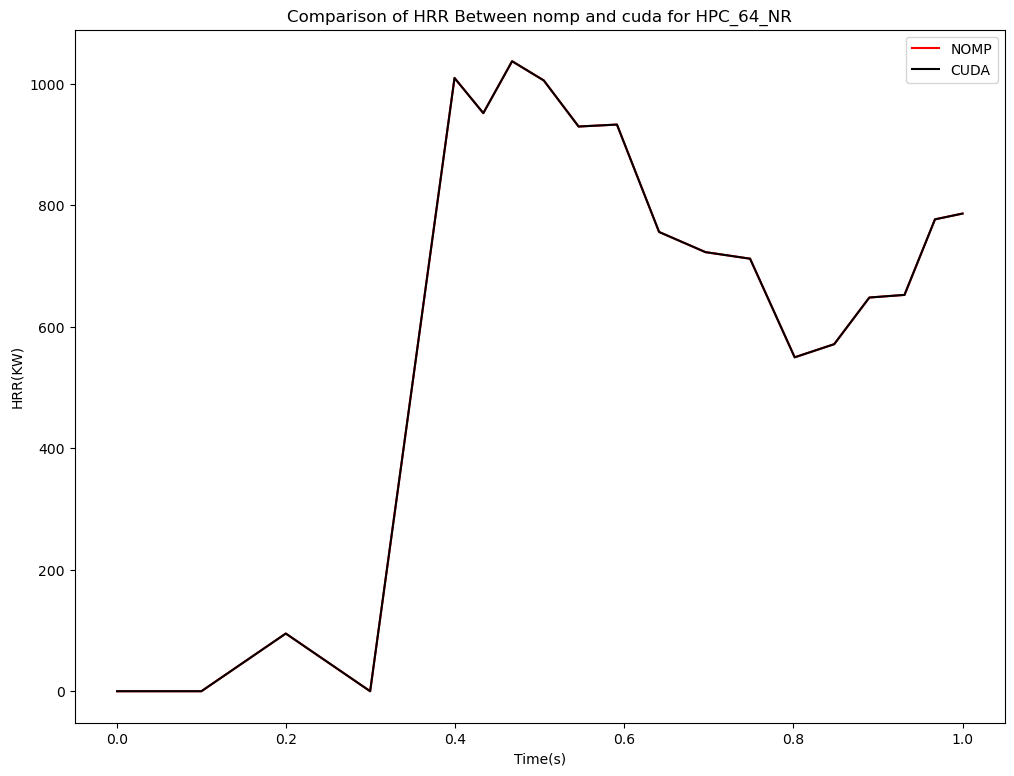

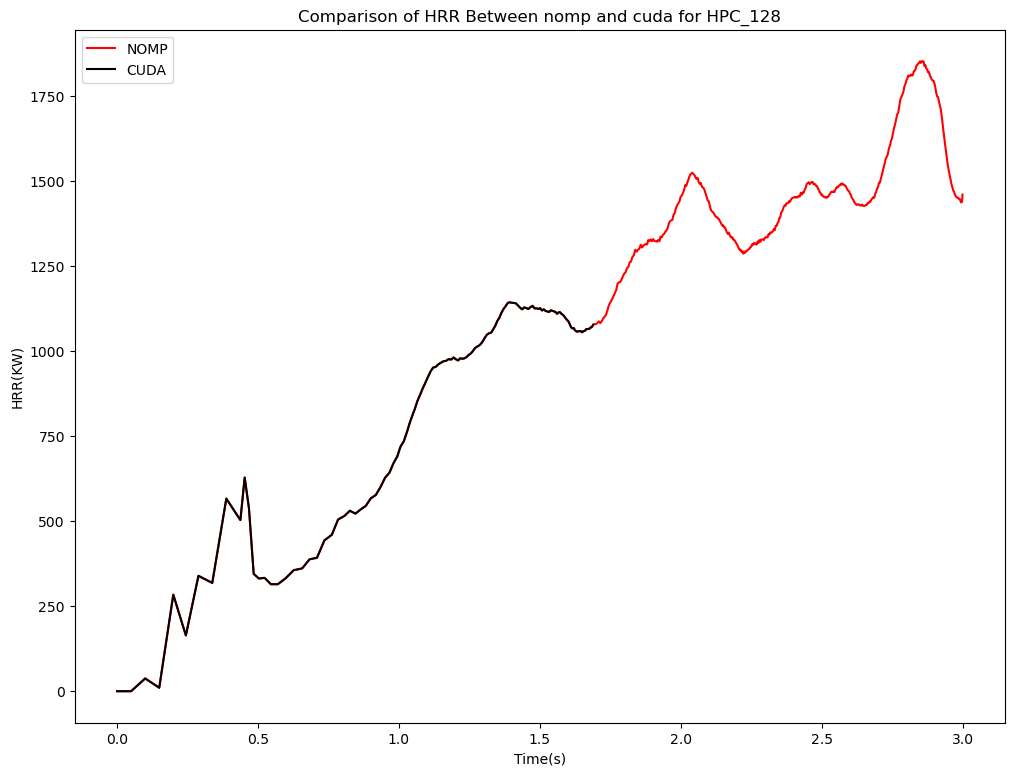

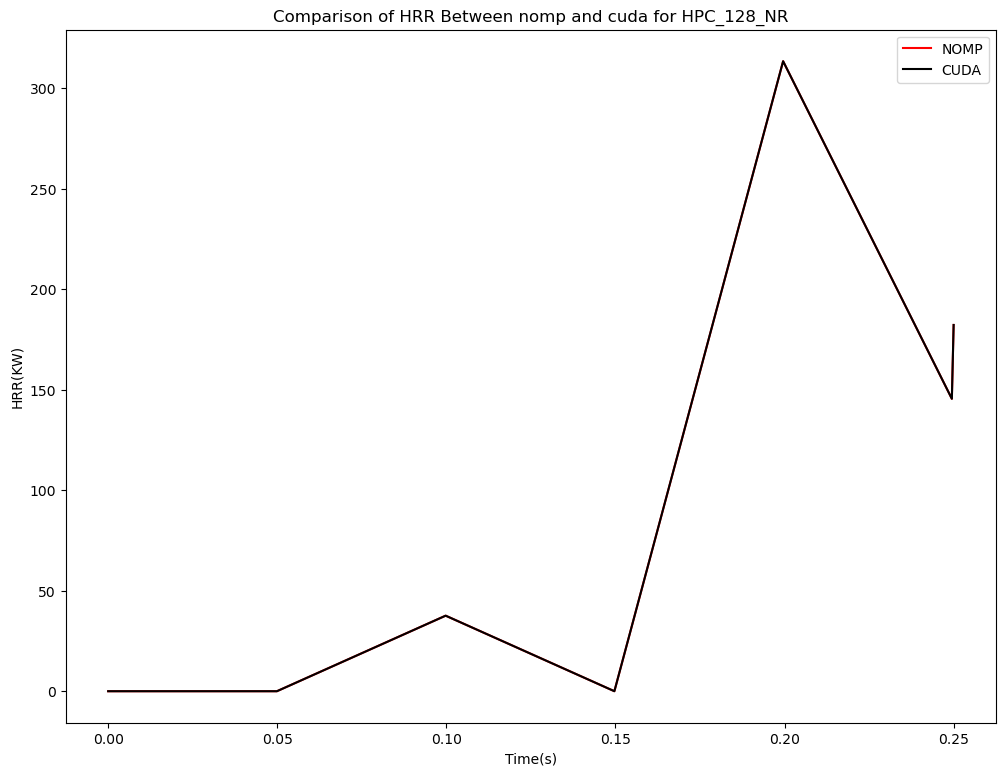

In [6]:

HRR_CMP(CUDA_dir, nomp_dir, "HPC_32")
HRR_CMP(CUDA_dir, nomp_dir, "HPC_32_NR")
HRR_CMP(CUDA_dir, nomp_dir,"HPC_64")
HRR_CMP(CUDA_dir, nomp_dir,"HPC_64_NR")
HRR_CMP(CUDA_dir, nomp_dir,"HPC_128")
HRR_CMP(CUDA_dir, nomp_dir,"HPC_128_NR")


## Speed comparison for performance improvement purpose

### For HPC

nomp simulation speed:
0.08284789473684216
CUDA simulation speed:
0.06409242671009775
sp_nomp/sp_cuda:
0.773615635179153
sp_nomp_total/sp_cuda_total:
0.7702463054187193


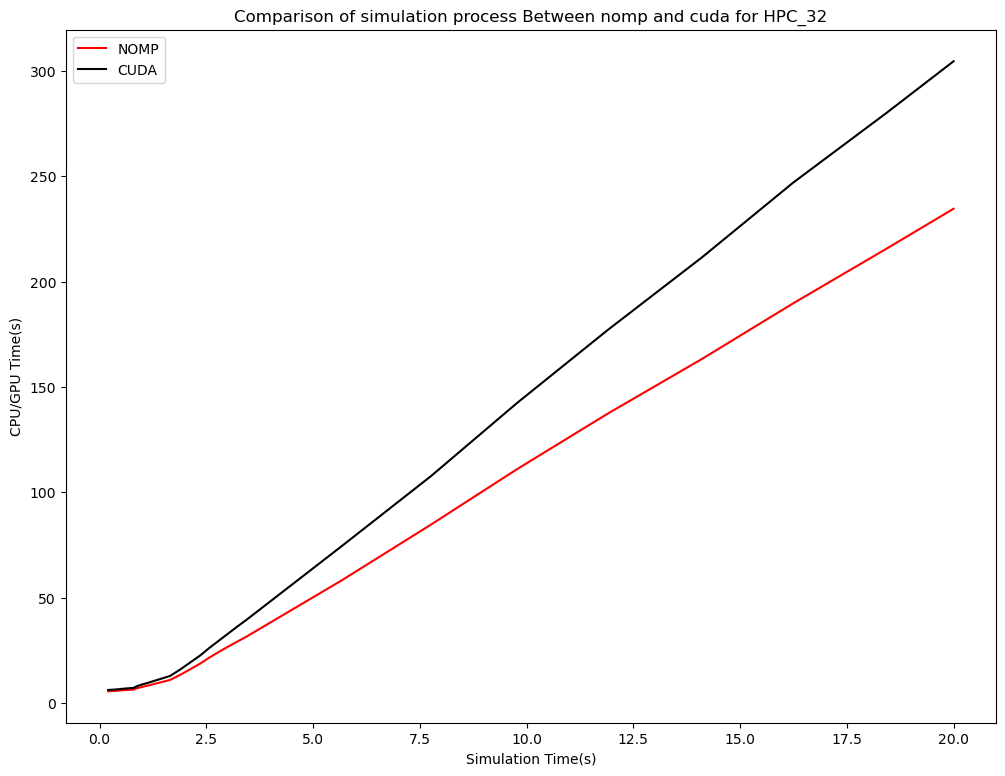

nomp simulation speed:
0.004638824038045829
CUDA simulation speed:
0.005854212134439111
sp_nomp/sp_cuda:
1.2620034919249234
sp_nomp_total/sp_cuda_total:
1.2367361546032032


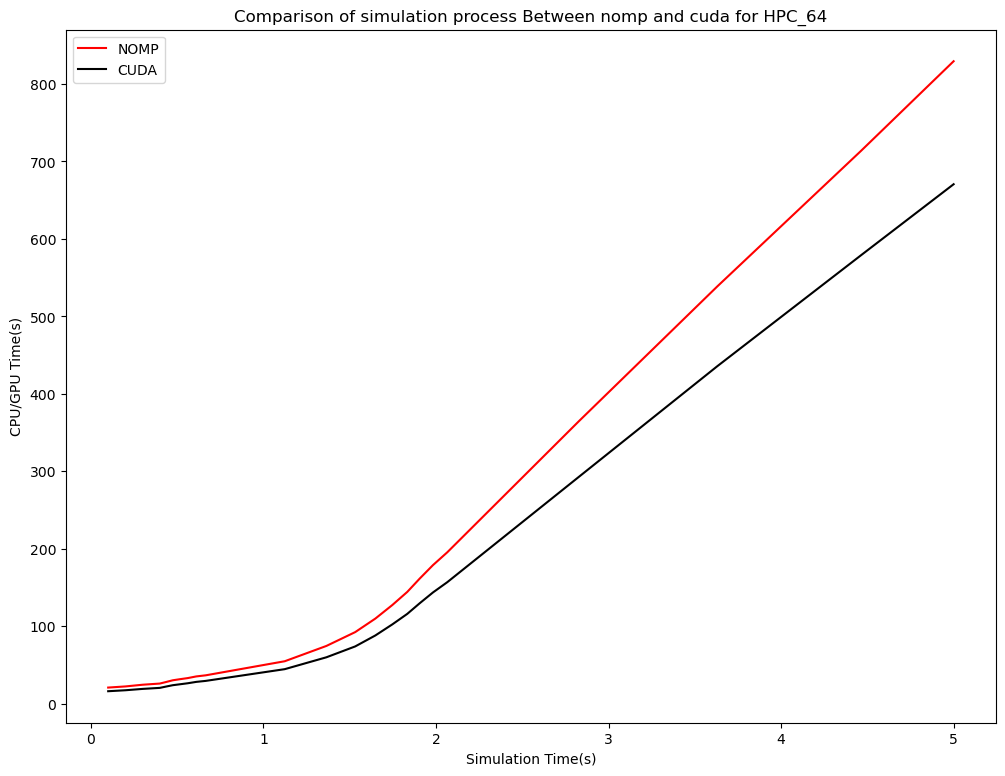

nomp simulation speed:
0.00025189035916824213
CUDA simulation speed:
0.0008440201729106615
sp_nomp/sp_cuda:
3.350744251180035
sp_nomp_total/sp_cuda_total:
3.532243211155958


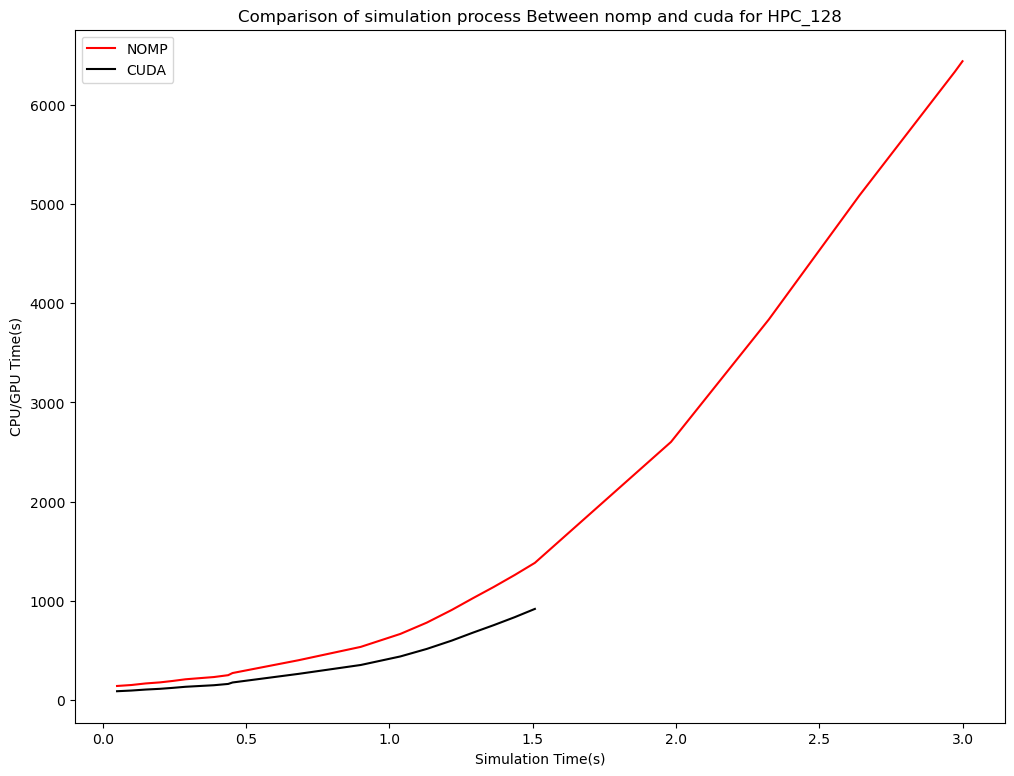

nomp simulation speed:
0.07990871369294597
CUDA simulation speed:
0.07581889763779505
sp_nomp/sp_cuda:
0.9488188976377934
sp_nomp_total/sp_cuda_total:
0.9226230331436224


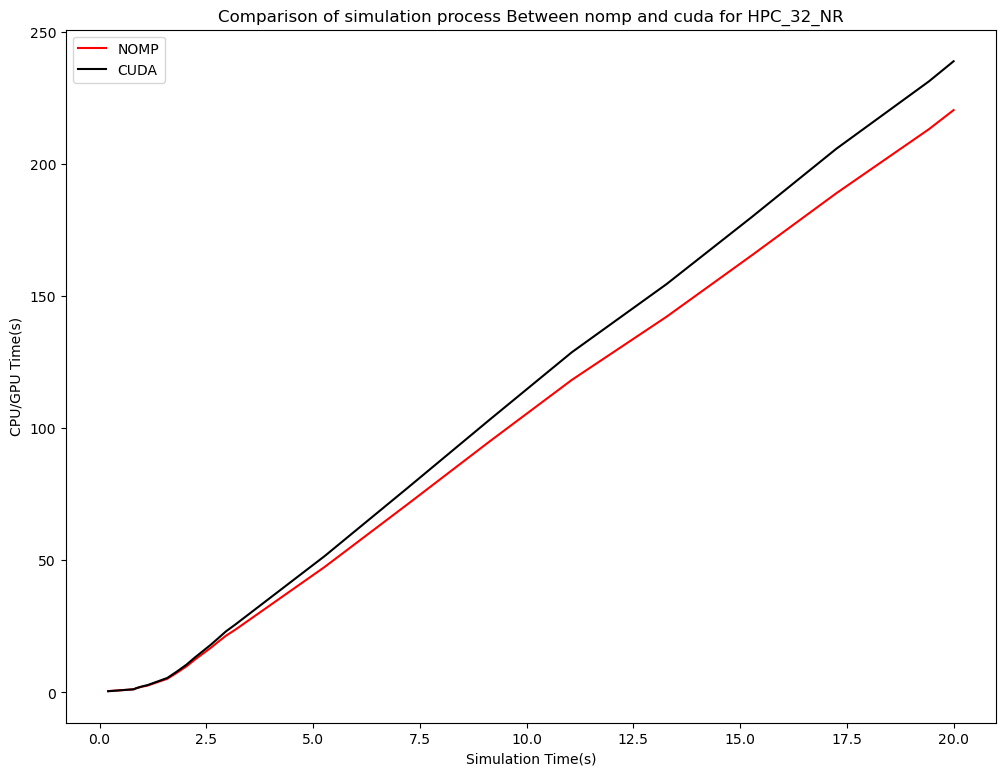

nomp simulation speed:
0.02676336788723992
CUDA simulation speed:
0.03539850069047149
sp_nomp/sp_cuda:
1.3226474649832312
sp_nomp_total/sp_cuda_total:
1.3197622452627815


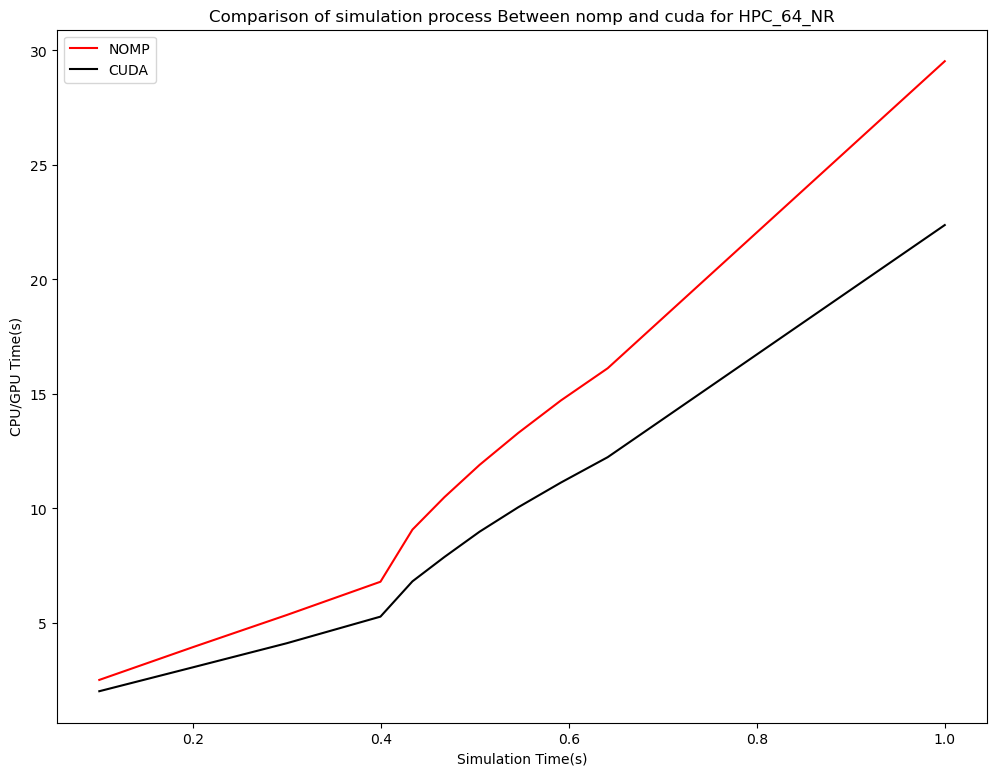

nomp simulation speed:
5.299633102323612e-05
CUDA simulation speed:
7.489557828028127e-05
sp_nomp/sp_cuda:
1.4132219501656347
sp_nomp_total/sp_cuda_total:
1.4861591304544324


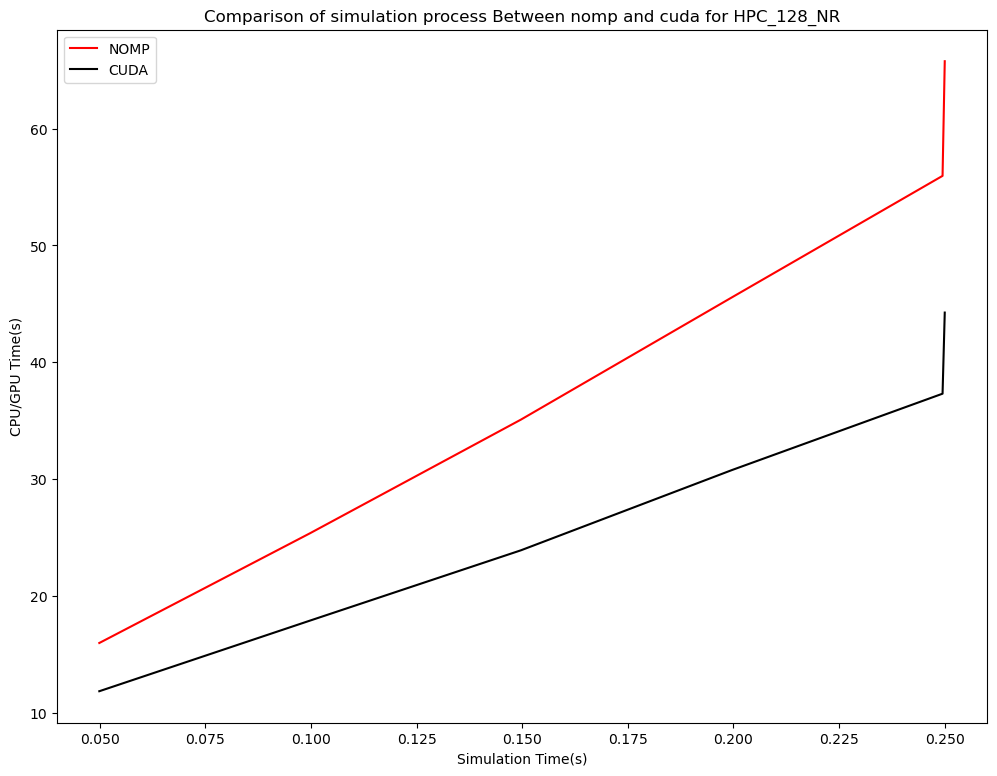

     FDS_CASE    GPU_SP    CPU_SP  GPU_IMP(%)
0      HPC_32  0.064092  0.082848  -22.638436
1      HPC_64  0.005854  0.004639   26.200349
2     HPC_128  0.000844  0.000252  235.074425
3   HPC_32_NR  0.075819  0.079909   -5.118110
4   HPC_64_NR  0.035399  0.026763   32.264746
5  HPC_128_NR  0.000075  0.000053   41.322195


In [7]:


gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "HPC_32")
df_1=pd.DataFrame({'FDS_CASE':['HPC_32'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "HPC_64")
df_2=pd.DataFrame({'FDS_CASE':['HPC_64'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp,'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "HPC_128")
df_3=pd.DataFrame({'FDS_CASE':['HPC_128'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})

gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "HPC_32_NR")
df_4=pd.DataFrame({'FDS_CASE':['HPC_32_NR'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "HPC_64_NR")
df_5=pd.DataFrame({'FDS_CASE':['HPC_64_NR'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "HPC_128_NR")
df_6=pd.DataFrame({'FDS_CASE':['HPC_128_NR'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp,'GPU_IMP(%)':perf_imp*100})

df=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6], ignore_index=True)

print(df)






### For benchmark 32/64/128

nomp simulation speed:
0.07614537444933904
CUDA simulation speed:
0.06751086956521742
sp_nomp/sp_cuda:
0.8866049980505866
sp_nomp_total/sp_cuda_total:
0.9045574196052744


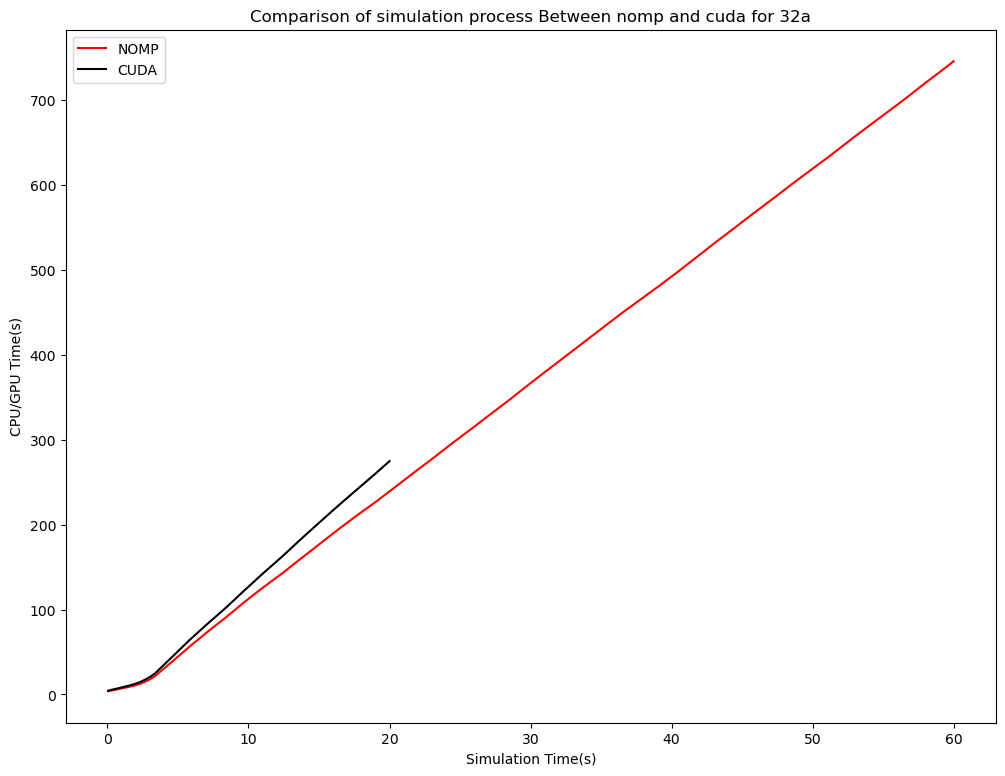

nomp simulation speed:
0.00423424657534245
CUDA simulation speed:
0.005115606936416017
sp_nomp/sp_cuda:
1.2081504573224544
sp_nomp_total/sp_cuda_total:
2.091942391867087


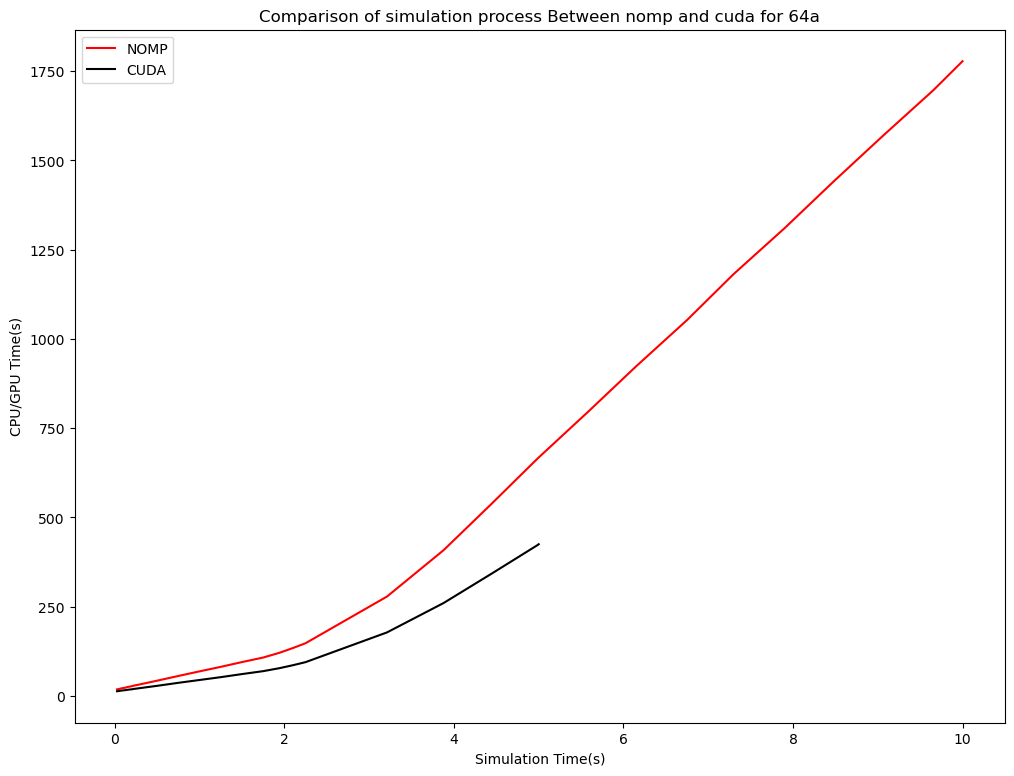

nomp simulation speed:
0.0010104204557612067
CUDA simulation speed:
0.000827938342967245
sp_nomp/sp_cuda:
0.8193998233572105
sp_nomp_total/sp_cuda_total:
1.4790540061133242


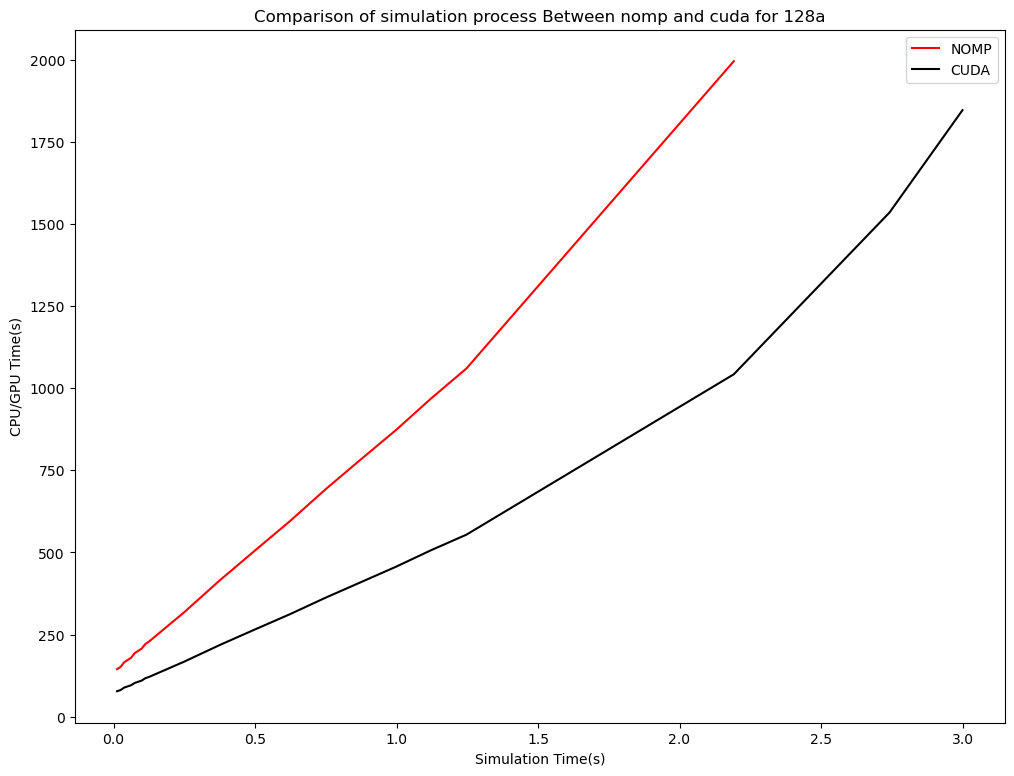

nomp simulation speed:
0.0912280701754385
CUDA simulation speed:
0.0855799373040752
sp_nomp/sp_cuda:
0.9380877742946714
sp_nomp_total/sp_cuda_total:
0.9509383501636923


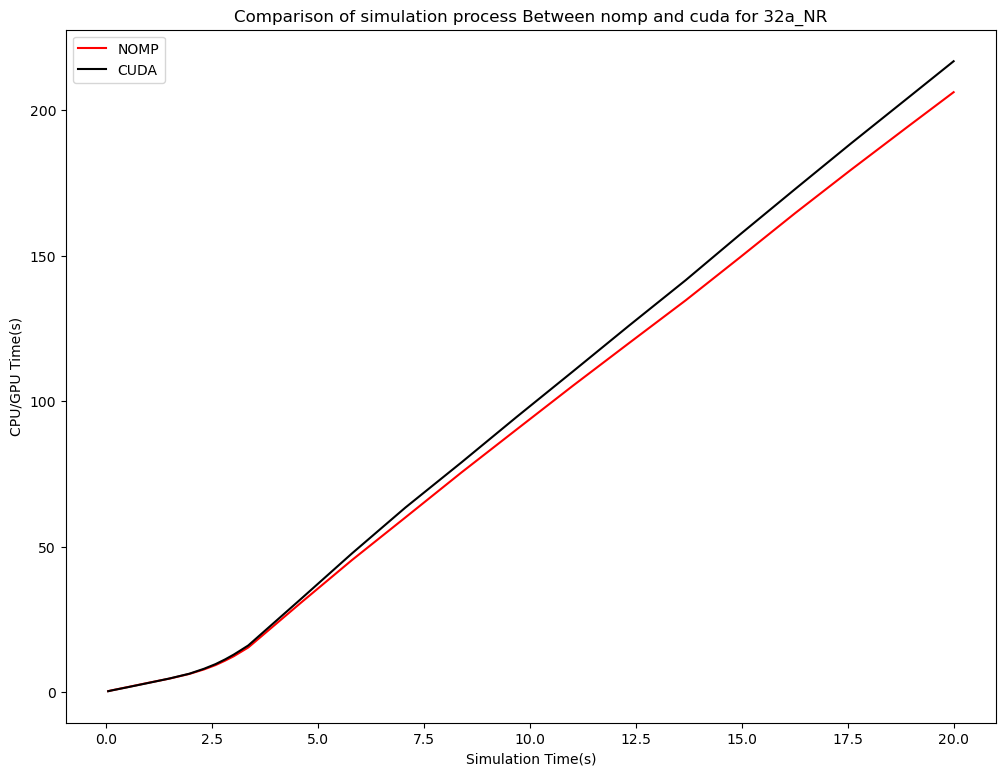

nomp simulation speed:
0.002027158098933112
CUDA simulation speed:
0.0034949832775920397
sp_nomp/sp_cuda:
1.7240802675585294
sp_nomp_total/sp_cuda_total:
1.7058235740836964


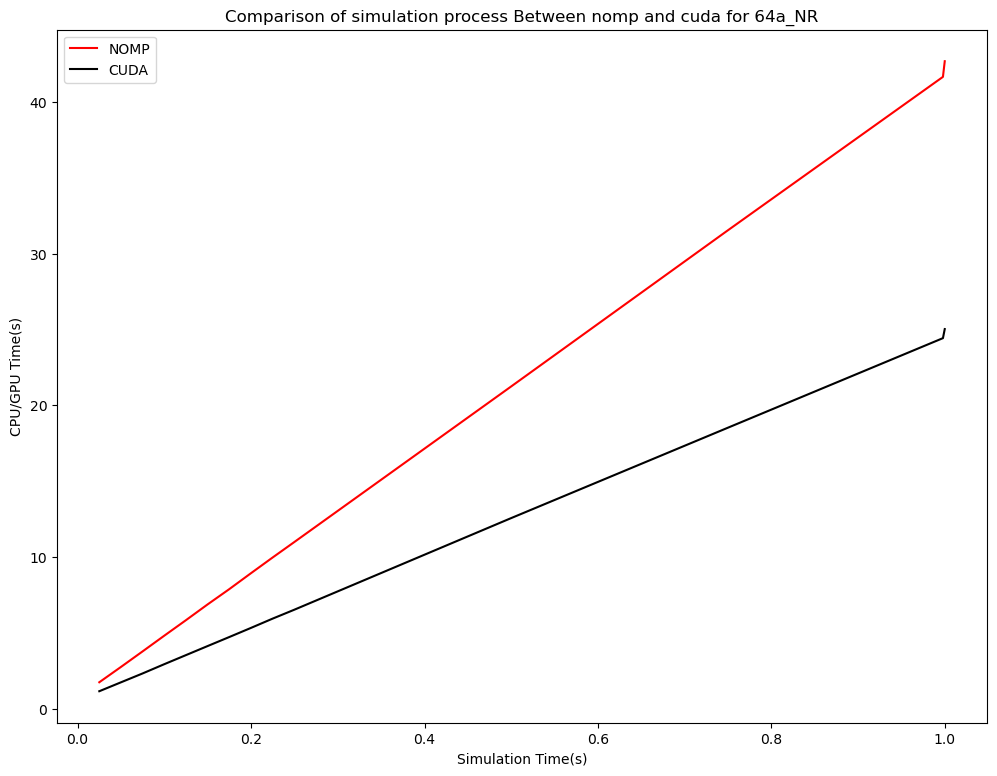

nomp simulation speed:
7.569141193595231e-05
CUDA simulation speed:
0.00015155931215388898
sp_nomp/sp_cuda:
2.002331681725447
sp_nomp_total/sp_cuda_total:
2.034564348078759


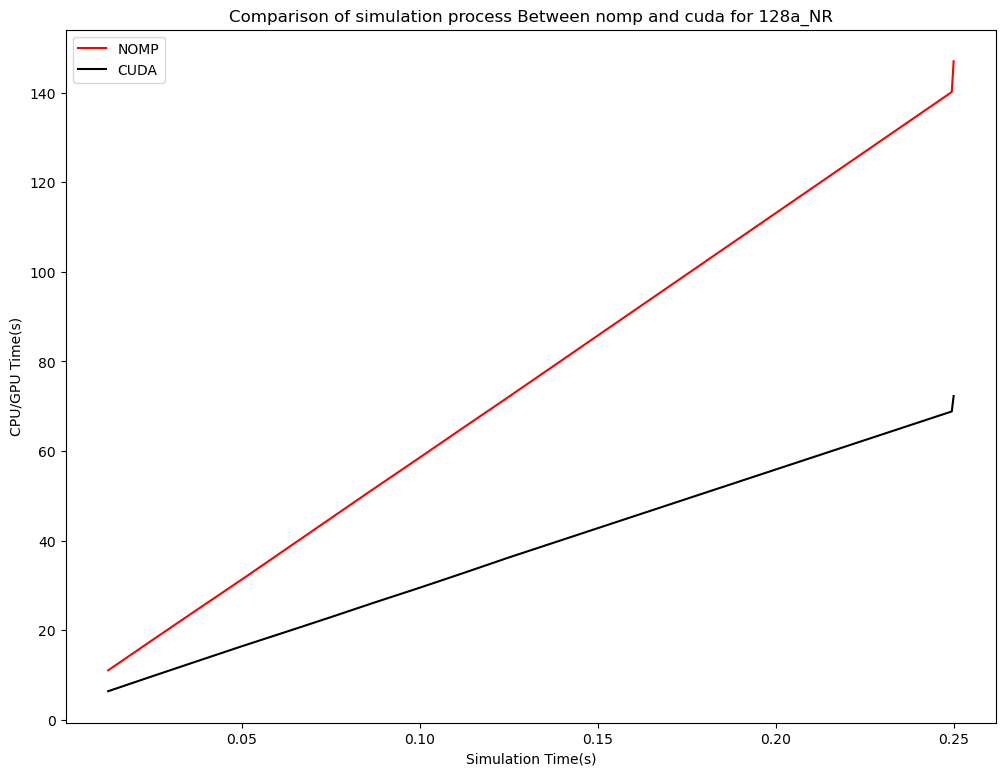

  FDS_CASE    GPU_SP    CPU_SP  GPU_IMP(%)
0      32a  0.067511  0.076145  -11.339500
1      64a  0.005116  0.004234   20.815046
2     128a  0.000828  0.001010  -18.060018
3   32a_NR  0.085580  0.091228   -6.191223
4   64a_NR  0.003495  0.002027   72.408027
5  128a_NR  0.000152  0.000076  100.233168


In [8]:

gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "32a")
df_1=pd.DataFrame({'FDS_CASE':['32a'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "64a")
df_2=pd.DataFrame({'FDS_CASE':['64a'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp,'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "128a")
df_3=pd.DataFrame({'FDS_CASE':['128a'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})

gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "32a_NR")
df_4=pd.DataFrame({'FDS_CASE':['32a_NR'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "64a_NR")
df_5=pd.DataFrame({'FDS_CASE':['64a_NR'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "128a_NR")
df_6=pd.DataFrame({'FDS_CASE':['128a_NR'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp,'GPU_IMP(%)':perf_imp*100})

df=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6], ignore_index=True)

print(df)





nomp simulation speed:
0.12228964059196627
CUDA simulation speed:
0.02486266924564802
sp_nomp/sp_cuda:
0.20330969267139506
sp_nomp_total/sp_cuda_total:
0.20704633204633205


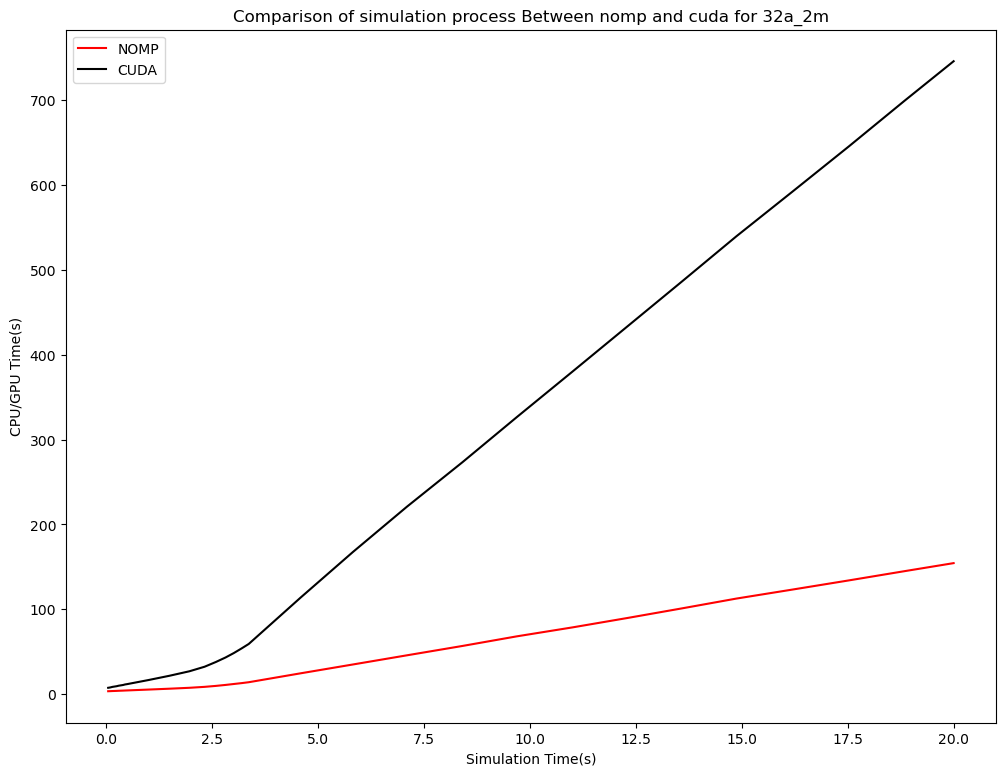

nomp simulation speed:
0.0033709677419355177
CUDA simulation speed:
0.0013518758085381932
sp_nomp/sp_cuda:
0.40103492884864655
sp_nomp_total/sp_cuda_total:
0.4702774108322325


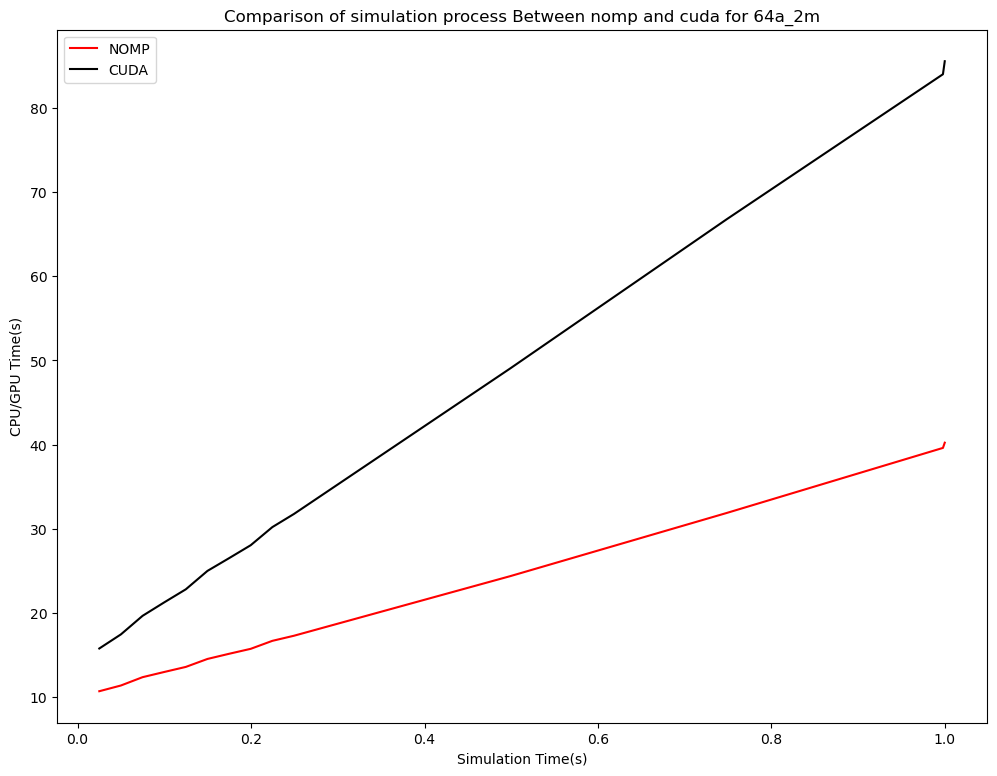

nomp simulation speed:
7.192254495158969e-05
CUDA simulation speed:
5.5496264674492255e-05
sp_nomp/sp_cuda:
0.771611526147277
sp_nomp_total/sp_cuda_total:
0.7780172413793104


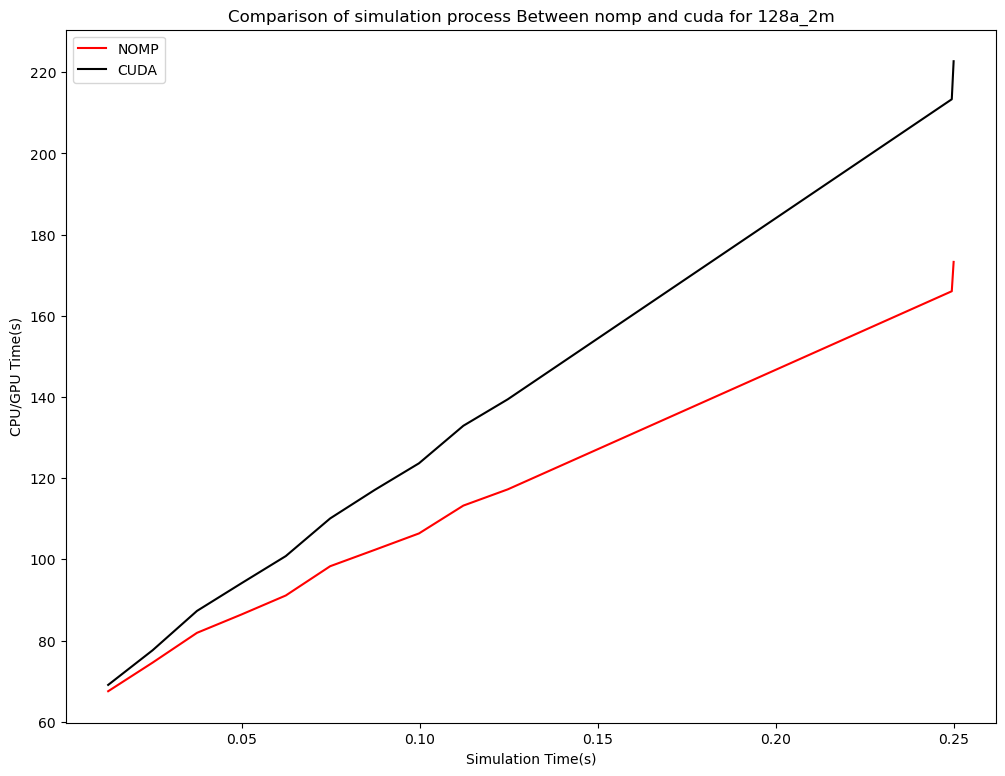

  FDS_CASE    GPU_SP    CPU_SP  GPU_IMP(%)
0   32a_2m  0.024863  0.122290  -79.669031
1   64a_2m  0.001352  0.003371  -59.896507
2  128a_2m  0.000055  0.000072  -22.838847


In [14]:
gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "32a_2m")
df_1=pd.DataFrame({'FDS_CASE':['32a_2m'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "64a_2m")
df_2=pd.DataFrame({'FDS_CASE':['64a_2m'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp,'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "128a_2m")
df_3=pd.DataFrame({'FDS_CASE':['128a_2m'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})

df=pd.concat([df_1,df_2,df_3], ignore_index=True)

print(df)

### For simple_test 

nomp simulation speed:
0.06179715302491088
CUDA simulation speed:
0.046808530805687074
sp_nomp/sp_cuda:
0.7574544864035762
sp_nomp_total/sp_cuda_total:
0.7207338028509886


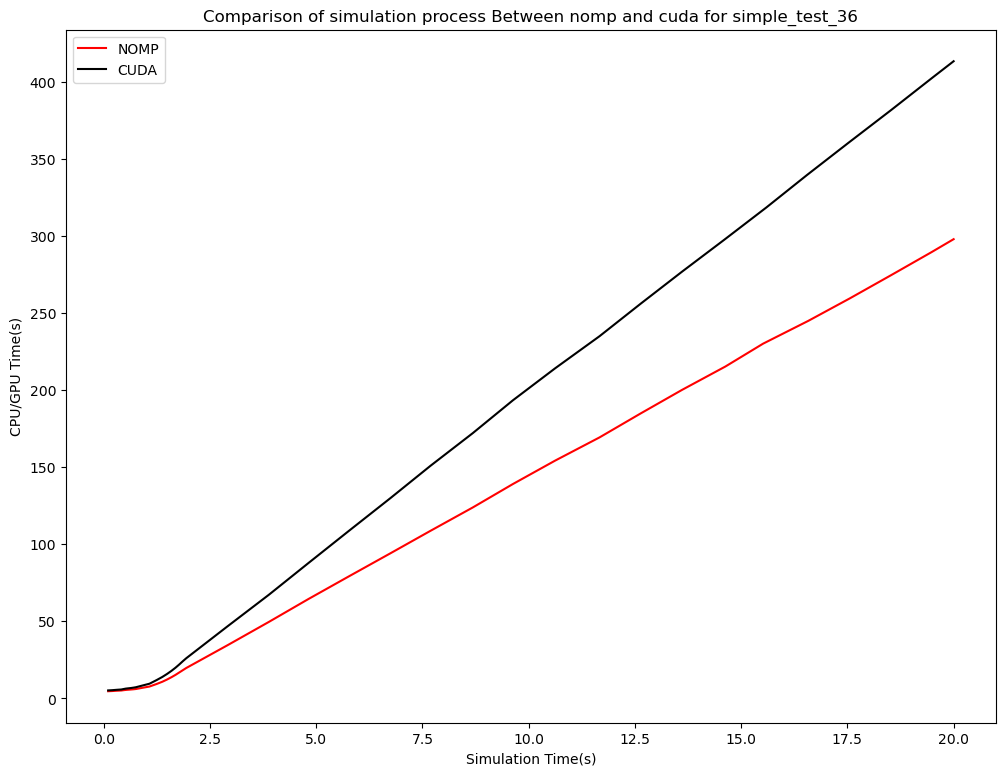

nomp simulation speed:
0.006102686308492208
CUDA simulation speed:
0.007580731969860069
sp_nomp/sp_cuda:
1.2421959095801933
sp_nomp_total/sp_cuda_total:
1.2473729216152019


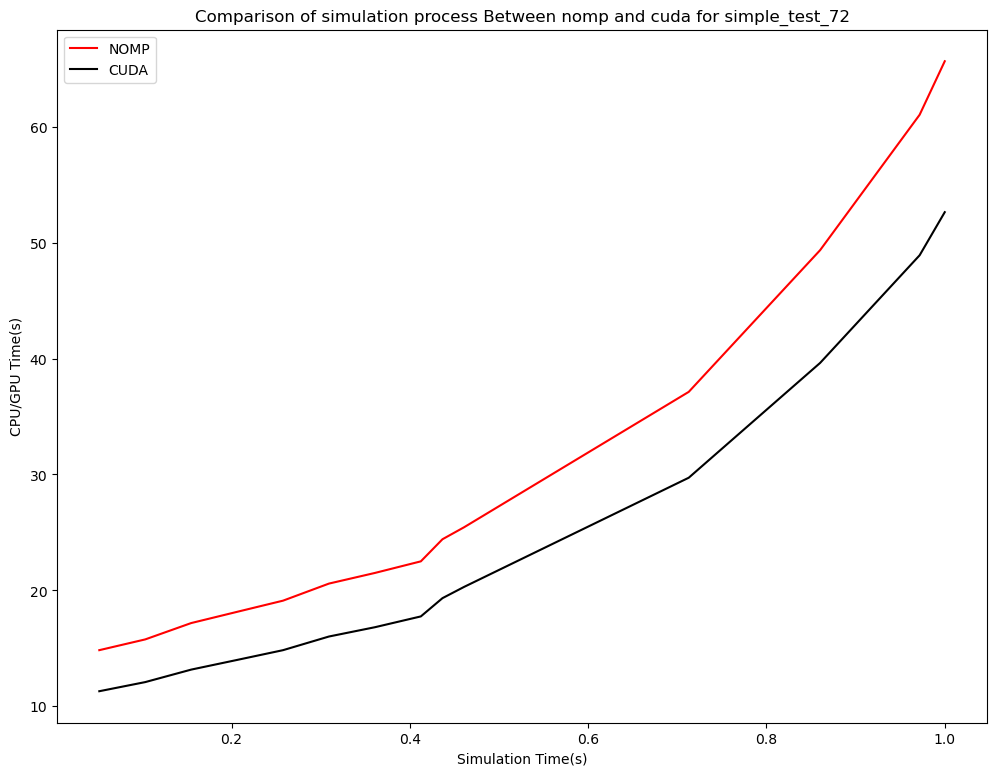

nomp simulation speed:
0.002856466876971605
CUDA simulation speed:
0.003931828050369086
sp_nomp/sp_cuda:
1.3764654798089473
sp_nomp_total/sp_cuda_total:
1.5643891534648655


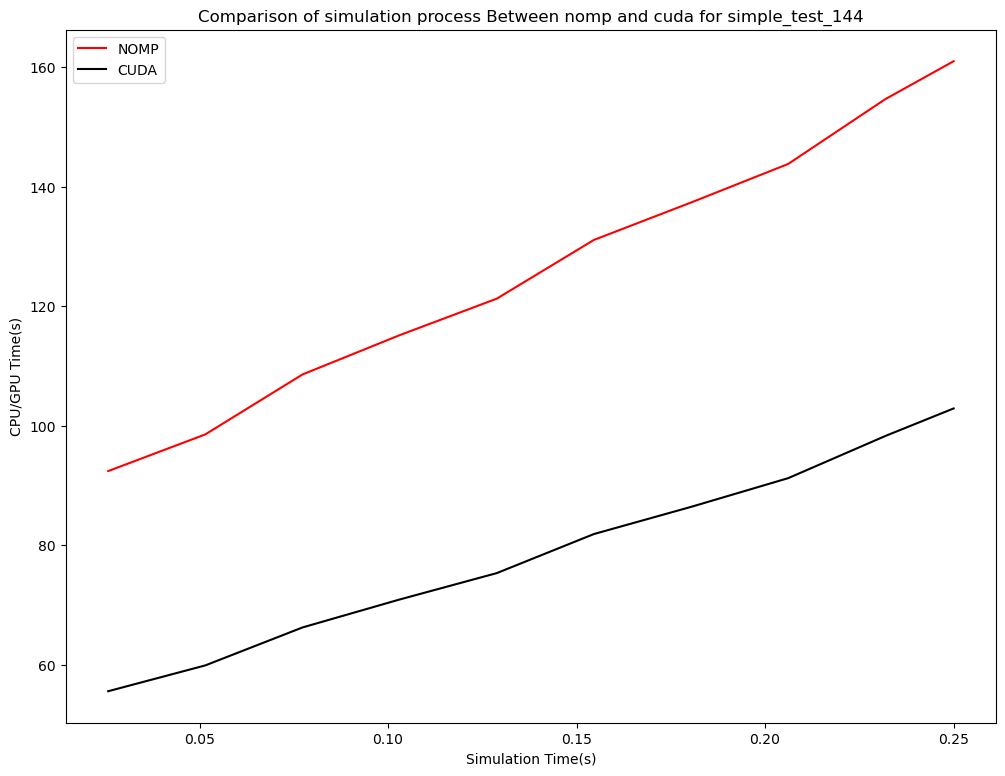

nomp simulation speed:
0.08847457627118596
CUDA simulation speed:
0.05771485943775027
sp_nomp/sp_cuda:
0.6523327024573341
sp_nomp_total/sp_cuda_total:
0.6643549825904291


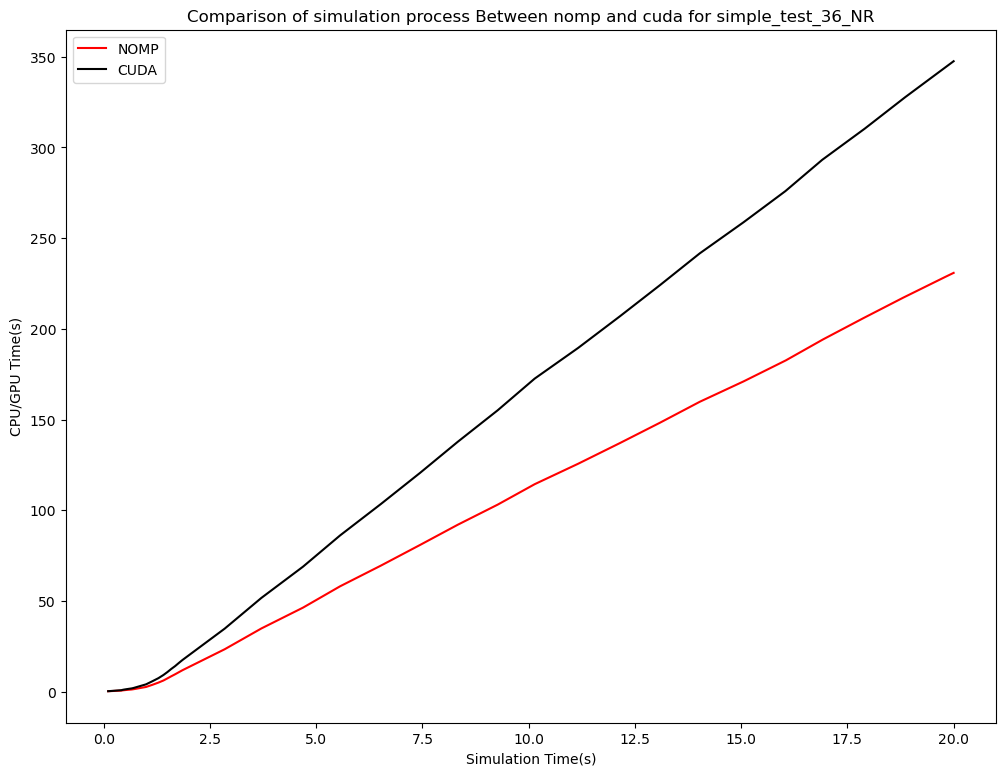

nomp simulation speed:
0.008571428571428596
CUDA simulation speed:
0.00874524714828898
sp_nomp/sp_cuda:
1.0202788339670446
sp_nomp_total/sp_cuda_total:
1.0308997832403266


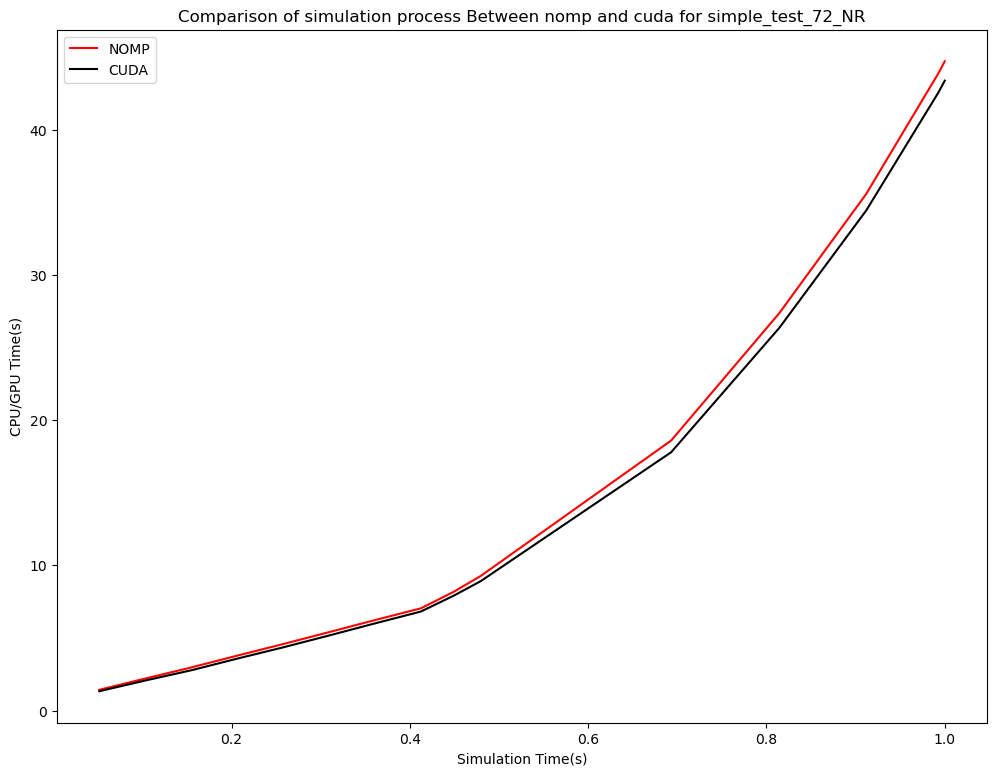

nomp simulation speed:
0.0034423113476525335
CUDA simulation speed:
0.004164175672568406
sp_nomp/sp_cuda:
1.2097033800873778
sp_nomp_total/sp_cuda_total:
1.2262894047511517


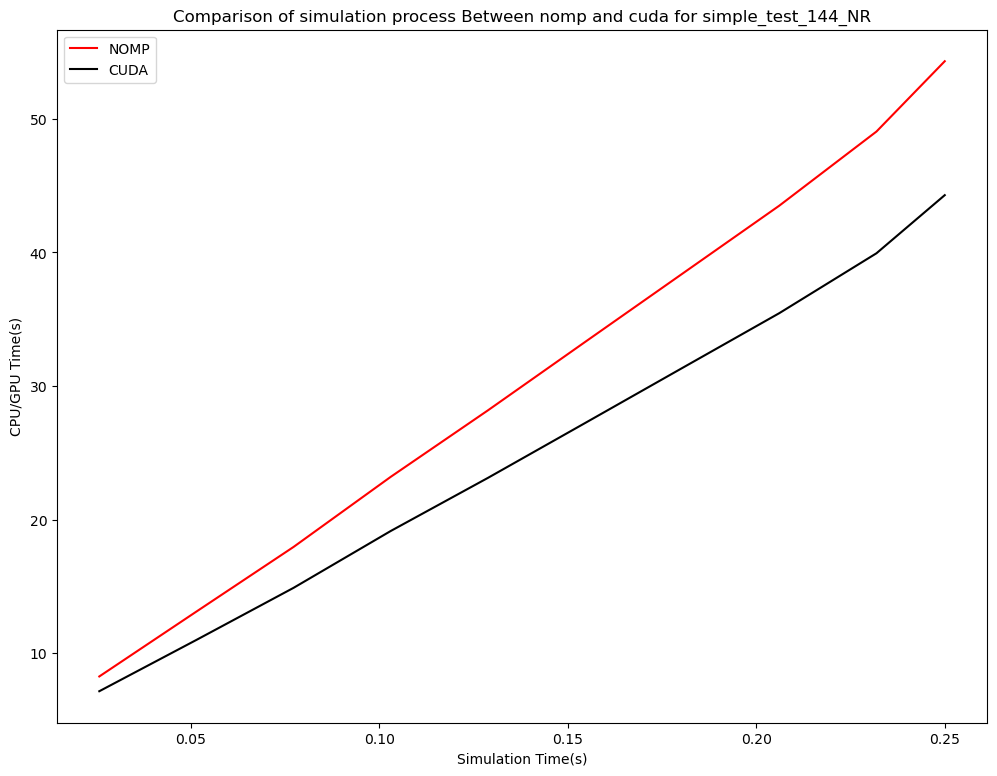

             FDS_CASE    GPU_SP    CPU_SP  GPU_IMP(%)
0      simple_test_36  0.046809  0.061797  -24.254551
1      simple_test_72  0.007581  0.006103   24.219591
2     simple_test_144  0.003932  0.002856   37.646548
3   simple_test_36_NR  0.057715  0.088475  -34.766730
4   simple_test_72_NR  0.008745  0.008571    2.027883
5  simple_test_144_NR  0.004164  0.003442   20.970338


In [98]:



gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "simple_test_36")
df_1=pd.DataFrame({'FDS_CASE':['simple_test_36'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "simple_test_72")
df_2=pd.DataFrame({'FDS_CASE':['simple_test_72'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp,'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "simple_test_144")
df_3=pd.DataFrame({'FDS_CASE':['simple_test_144'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})

gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "simple_test_36_NR")
df_4=pd.DataFrame({'FDS_CASE':['simple_test_36_NR'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP(  CUDA_dir, nomp_dir, "simple_test_72_NR")
df_5=pd.DataFrame({'FDS_CASE':['simple_test_72_NR'],'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp, 'GPU_IMP(%)':perf_imp*100})
gpu_sp, cpu_sp, perf_imp = STEPS_CMP( CUDA_dir, nomp_dir, "simple_test_144_NR")
df_6=pd.DataFrame({'FDS_CASE':['simple_test_144_NR'], 'GPU_SP':gpu_sp, 'CPU_SP':cpu_sp,'GPU_IMP(%)':perf_imp*100})

df=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6], ignore_index=True)

print(df)




